# Process Results

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Import Valid Data

In [6]:
# One attacked model 
adv1 = np.load('four_subset_FGSM/adv_large_1.csv.npy')
adv2 = np.load('four_subset_FGSM/adv_large_2.csv.npy')
adv3 = np.load('four_subset_FGSM/adv_large_3.csv.npy')
adv4 = np.load('four_subset_FGSM/adv_large_4.csv.npy')

# Two attacked models 
adv12 = np.load('four_subset_FGSM/adv_large_12.csv.npy')
adv13 = np.load('four_subset_FGSM/adv_large_13.csv.npy')
adv14 = np.load('four_subset_FGSM/adv_large_14.csv.npy')
adv23 = np.load('four_subset_FGSM/adv_large_23.csv.npy')
adv24 = np.load('four_subset_FGSM/adv_large_24.csv.npy')
adv34 = np.load('four_subset_FGSM/adv_large_34.csv.npy')

# Three attacked models
adv123 = np.load('four_subset_FGSM/adv_large_123.csv.npy')
adv124 = np.load('four_subset_FGSM/adv_large_124.csv.npy')
adv134 = np.load('four_subset_FGSM/adv_large_134.csv.npy')
adv234 = np.load('four_subset_FGSM/adv_large_234.csv.npy')

# Four attacked models
adv1234 = np.load('four_subset_FGSM/adv_large_1234.csv.npy')

In [3]:
# One attacked model 
inp1 = np.load('inputs_0.csv.npy')
inp2 = np.load('inputs_0.csv.npy')
inp3 = np.load('inputs_0.csv.npy')
inp4 = np.load('inputs_0.csv.npy')

# Two attacked models 
inp12 = np.load('inputs_0.csv.npy')
inp13 = np.load('inputs_0.csv.npy')
inp14 = np.load('inputs_0.csv.npy')
inp23 = np.load('inputs_0.csv.npy')
inp24 = np.load('inputs_0.csv.npy')
inp34 = np.load('inputs_0.csv.npy')

# Three attacked models
inp123 = np.load('inputs_0.csv.npy')
inp124 = np.load('inputs_0.csv.npy')
inp134 = np.load('inputs_0.csv.npy')
inp234 = np.load('inputs_0.csv.npy')

# Four attacked models
inp1234 = np.load('inputs_0.csv.npy')

In [4]:
inp1.shape

(25, 28, 28, 1)

In [7]:
one_attack = [adv1, adv2, adv3, adv4]
two_attack = [adv12, adv13, adv14, adv23, adv24, adv34]
three_attack = [adv123, adv124, adv134, adv234]
four_attack = [adv1234]

one_attack_inp = [inp1, inp2, inp3, inp4]
two_attack_inp = [inp12, inp13, inp14, inp23, inp24, inp34]
three_attack_inp = [inp123, inp124, inp134, inp234]
four_attack_inp = [inp1234]

## Find & Plot Attack Size Differences for Varied M & N 

### M = Number attacked
### N = Number defended

In [6]:
import tensorflow as tf
import tensorflow.keras.backend as K
from keras.models import load_model, Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten

Using TensorFlow backend.


In [7]:
sess = tf.Session(config=tf.ConfigProto())
K.set_session(sess)

# CNN Model for MNIST 
class MNIST_Model:
    def __init__(self, session=None):
        self.num_channels = 1
        self.image_size = 28
        self.num_labels = 10

        model = Sequential()

        model.add(Conv2D(32, (3, 3),
                         input_shape=(28, 28, 1)))
        model.add(Activation('relu'))
        model.add(Conv2D(32, (3, 3)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(64, (3, 3)))
        model.add(Activation('relu'))
        model.add(Conv2D(64, (3, 3)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Flatten())
        model.add(Dense(200))
        model.add(Activation('relu'))
        model.add(Dense(200))
        model.add(Activation('relu'))
        model.add(Dense(10))

        self.model = model

    def predict(self, data):
        return self.model(data)
    
def fn(correct, predicted):
    return tf.nn.softmax_cross_entropy_with_logits(labels=correct,
                                                   logits=predicted)

In [8]:
model1 = MNIST_Model()
model1.model = load_model('models/trained_model1', custom_objects={'fn':fn})

model2 = MNIST_Model()
model2.model = load_model('models/trained_model2', custom_objects={'fn':fn})

model3 = MNIST_Model()
model3.model = load_model('models/trained_model3', custom_objects={'fn':fn})

model4 = MNIST_Model()
model4.model = load_model('models/trained_model4', custom_objects={'fn':fn})

model5 = MNIST_Model()
model5.model = load_model('models/trained_model5', custom_objects={'fn':fn})


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.




In [11]:
def size_of_attack(adv, inputs, num_img=10):
    perturb = adv[0] - inputs
    perturb_mean =  np.sum(np.abs(perturb)) / num_img 
    perturb_std = np.std(np.array([sum(x) for x in perturb]))
    return (perturb_mean, perturb_std)

In [12]:
num_one_attack = 4
num_two_attack = 6
num_three_attack = 4
mean_attack = []
std_attack = []

# M = 1
mean = 0
var = 0
for i in range(len(one_attack)):
    res = size_of_attack(one_attack[i], one_attack_inp[i])
    mean += res[0]
    var += res[1] ** 2
mean_attack.append(mean / num_one_attack)
std_attack.append(np.sqrt(var))

# M = 2
mean = 0
var = 0
for i in range(len(two_attack)):
    res = size_of_attack(two_attack[i], two_attack_inp[i])
    mean += res[0]
    var += res[1] ** 2
mean_attack.append(mean / num_two_attack)
std_attack.append(np.sqrt(var))

# M = 3
mean = 0
var = 0
for i in range(len(three_attack)):
    res = size_of_attack(three_attack[i], three_attack_inp[i])
    mean += res[0]
    var += res[1] ** 2
mean_attack.append(mean/ num_three_attack)
std_attack.append(np.sqrt(var))

# M = 4
res = size_of_attack(four_attack[0], four_attack_inp[0])
mean = res[0]
var = res[1] ** 2
mean_attack.append(mean)
std_attack.append(np.sqrt(var))

In [13]:
print(mean_attack)
print(std_attack)

[1135.8742309570312, 839.1818115234373, 1049.0494506835937, 484.375341796875]
[11.322341616517631, 11.944428914639037, 11.000819295507961, 3.799449920654297]


In [14]:
def get_label_probabilities(image, model):
    image = image[0]
    pr = model.predict(image)
    pr = np.array([np.exp(x) for x in pr])
    return pr / np.sum(pr)

def get_label_probabilities2(image, model):
    pr = model.predict(image)
    pr = np.array([np.exp(x) for x in pr])
    return pr / np.sum(pr)

def avg_probability(adv, model, flag):
    pr_true_avg = 0
    for i in range(0, len(adv)):
        if flag == 0:
            pr_true_avg += get_label_probabilities(adv[i][np.newaxis, ...], model)[0][0]
        else:
            pr_true_avg += get_label_probabilities2(adv[i][np.newaxis, ...], model)[0][0]
    return pr_true_avg / len(adv)

In [15]:
mean_transferability = []

mean = 0
for adv in one_attack:
    mean += avg_probability(adv, model5.model)
mean_transferability.append(mean / len(one_attack))

TypeError: avg_probability() missing 1 required positional argument: 'flag'

In [16]:
mean = 0
for adv in two_attack:
    mean += avg_probability(adv, model5.model)
mean_transferability.append(mean / len(two_attack))

TypeError: avg_probability() missing 1 required positional argument: 'flag'

In [17]:
mean = 0
for adv in three_attack:
    mean += avg_probability(adv, model5.model)
mean_transferability.append(mean / len(three_attack))

TypeError: avg_probability() missing 1 required positional argument: 'flag'

In [18]:
mean = 0
for adv in four_attack:
    mean += avg_probability(adv, model5.model)
mean_transferability.append(mean / len(four_attack))

TypeError: avg_probability() missing 1 required positional argument: 'flag'

In [46]:
mean_transferability

[0.9516146091744304,
 0.7765312717060565,
 0.2385784080938538,
 0.06487177476662315]

In [54]:
difference_transferability = []

mean = 0
for i in range(len(one_attack)):
    mean += avg_probability(one_attack_inp[i], model5.model, 1) - avg_probability(one_attack[i], model5.model, 0)
difference_transferability.append(mean / len(one_attack))

In [55]:
mean = 0
for i in range(len(two_attack)):
    mean += avg_probability(two_attack_inp[i], model5.model, 1) - avg_probability(two_attack[i], model5.model, 0)
difference_transferability.append(mean / len(two_attack))

mean = 0
for i in range(len(three_attack)):
    mean += avg_probability(three_attack_inp[i], model5.model, 1) - avg_probability(three_attack[i], model5.model, 0)
difference_transferability.append(mean / len(three_attack))

mean = 0
for i in range(len(four_attack)):
    mean += avg_probability(four_attack_inp[i], model5.model, 1) - avg_probability(four_attack[i], model5.model, 0)
difference_transferability.append(mean / len(four_attack))

In [59]:
mean_attack

[10707.6255859375, 10450.355078125, 9256.6046875, 10422.35859375]

In [56]:
difference_transferability

[0.048236511833965795,
 0.22152344031132087,
 0.7613618918939391,
 0.9351257277987608]

In [19]:
plt.set_cmap('Greys_r')
plt.style.use('seaborn-dark-palette')
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

## Plot Magnitude vs M, N

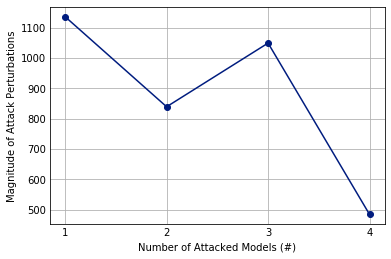

In [20]:
from matplotlib.ticker import (AutoLocator, AutoMinorLocator)

M = [1, 2, 3, 4]
N = [3, 2, 1, 0]

plt.plot(M, mean_attack, linestyle='-', marker='o')
plt.xticks(M, ['1', '2', '3', '4'])
plt.xlabel('Number of Attacked Models (#)')
plt.ylabel('Magnitude of Attack Perturbations')
ax = plt.gca()
ax.tick_params(axis=u'both', which=u'both',length=0)
fig = plt.gcf()
plt.grid()
plt.show()
fig.savefig('magnitude_of_attack_FGSM_four.png')

## Transferability of Attack vs M, N

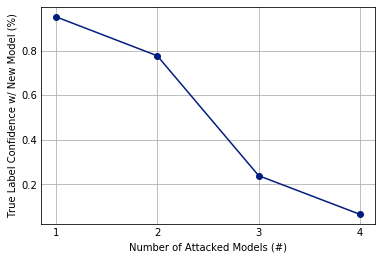

In [64]:
M = [1, 2, 3, 4]
plt.plot(M, mean_transferability, linestyle='-', marker='o')
plt.xticks(M, ['1', '2', '3', '4'])
plt.xlabel('Number of Attacked Models (#)')
plt.ylabel('True Label Confidence w/ New Model (%)')
ax = plt.gca()
ax.tick_params(axis=u'both', which=u'both',length=0)
fig = plt.gcf()
plt.grid()
plt.show()

fig.savefig('true_label_confidence.png')

In [23]:
def plot_adversarial(inputs, adv, num):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    ax2.axis('off')
    ax2.imshow(inputs[0][:,:,0])
    ax1.axis('off')
    ax1.imshow(adv[0][:,:,0])
    ax3.axis('off')
    ax3.imshow(adv[0][:,:,0] - inputs[0][:,:,0])
    ax1.margins(0,0)
    ax2.margins(0,0)
    ax3.margins(0,0)
    fig.savefig(str(num) + '_attack_example.pdf', bbox_inches = 'tight', pad_inches = 0)

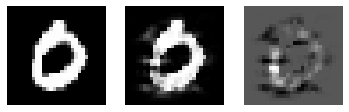

In [24]:
plot_adversarial(adv1, inp1, 1)

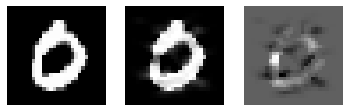

In [25]:
plot_adversarial(adv23, inp23, 2)

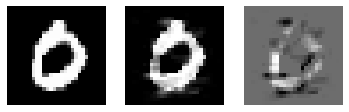

In [26]:
plot_adversarial(adv123, inp123, 3)

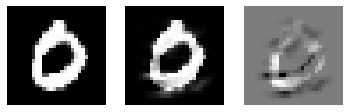

In [40]:
plot_adversarial(adv1234, inp1234, 4)

# Compute Probabilities of Successful Attack

In [19]:
# One attacked model 
adv1 = np.load('four_subset_data/adv_att_1.csv.npy')
adv2 = np.load('four_subset_data/adv_att_2.csv.npy')
adv3 = np.load('four_subset_data/adv_att_3.csv.npy')
adv4 = np.load('four_subset_data/adv_att_4.csv.npy')

# Two attacked models 
adv12 = np.load('four_subset_data/adv_att_new_12.csv.npy')
adv13 = np.load('four_subset_data/adv_att_13.csv.npy')
adv14 = np.load('four_subset_data/adv_att_14.csv.npy')
adv23 = np.load('four_subset_data/adv_att_23.csv.npy')
adv24 = np.load('four_subset_data/adv_att_24.csv.npy')
adv34 = np.load('four_subset_data/adv_att_34.csv.npy')

# Three attacked models
adv123 = np.load('four_subset_data/adv_att_123.csv.npy')
adv124 = np.load('four_subset_data/adv_att_124.csv.npy')
adv134 = np.load('four_subset_data/adv_att_134.csv.npy')
adv234 = np.load('four_subset_data/adv_att_234.csv.npy')

# Four attacked models
adv1234 = np.load('four_subset_data/adv_att_1234.csv.npy')

In [20]:
one_attack = [adv1, adv2, adv3, adv4]
two_attack = [adv12, adv13, adv14, adv23, adv24, adv34]
three_attack = [adv123, adv124, adv134, adv234]
four_attack = [adv1234]

In [21]:
print(adv12.shape)

(25, 28, 28, 1)


In [4]:
def get_label_confidence(image, model):
    pr = model.predict(image)
    pr = np.array([np.exp(x) for x in pr])
    pr = pr / np.sum(pr)
    image_class = model.predict_classes(image)
    return image_class[0], max(max(pr))

In [23]:
def attack_evaluation(num_img, adv, num_models):
    l = []
    for i in range(0, num_img):
        res = [get_label_confidence(adv[i][np.newaxis, ...], model1.model), get_label_confidence(adv[i][np.newaxis, ...], model2.model), get_label_confidence(adv[i][np.newaxis, ...], model3.model), get_label_confidence(adv[i][np.newaxis, ...], model4.model)]
        l.append(res)
    return l

In [24]:
def check_correct(subset, num_img, adv, num_models, target_label=9, true_label=0):
    l = attack_evaluation(num_img, adv, num_models)
    correct = []
    for res in l:
        if subset == '1':
            output = True if res[0][0] == target_label and res[1][0] == true_label and res[2][0] == true_label and res[3][0] == true_label else False
        elif subset == '2':
            output = True if res[0][0] == true_label and res[1][0] == target_label and res[2][0] == true_label and res[3][0] == true_label else False
        elif subset == '3':
            output = True if res[0][0] == true_label and res[1][0] == true_label and res[2][0] == target_label and res[3][0] == true_label else False
        elif subset == '4':
            output = True if res[0][0] == true_label and res[1][0] == true_label and res[2][0] == true_label and res[3][0] == target_label else False
        elif subset == '12':
            output = True if res[0][0] == target_label and res[1][0] == target_label and res[2][0] == true_label and res[3][0] == true_label else False
        elif subset == '13':
            output = True if res[0][0] == target_label and res[1][0] == true_label and res[2][0] == target_label and res[3][0] == true_label else False
        elif subset == '14':
            output = True if res[0][0] == target_label and res[1][0] == true_label and res[2][0] == true_label and res[3][0] == target_label else False
        elif subset == '23':
            output = True if res[0][0] == true_label and res[1][0] == target_label and res[2][0] == target_label and res[3][0] == true_label else False
        elif subset == '24':
            output = True if res[0][0] == true_label and res[1][0] == target_label and res[2][0] == true_label and res[3][0] == target_label else False
        elif subset == '34':
            output = True if res[0][0] == true_label and res[1][0] == true_label and res[2][0] == target_label and res[3][0] == target_label else False
        elif subset == '123':
            output = True if res[0][0] == target_label and res[1][0] == target_label and res[2][0] == target_label and res[3][0] == true_label else False
        elif subset == '124':
            output = True if res[0][0] == target_label and res[1][0] == target_label and res[2][0] == true_label and res[3][0] == target_label else False
        elif subset == '134':
            output = True if res[0][0] == target_label and res[1][0] == true_label and res[2][0] == target_label and res[3][0] == target_label else False
        elif subset == '234':
            output = True if res[0][0] == true_label and res[1][0] == target_label and res[2][0] == target_label and res[3][0] == target_label else False
        elif subset == '1234':
            output = True if res[0][0] == target_label and res[1][0] == target_label and res[2][0] == target_label and res[3][0] == target_label else False
            
        if output:
            correct.append(l.index(res))
    return correct

In [30]:
prob = []
correct = []
total_correct = 0
for i in range(len(one_attack)):
    correct.append(check_correct(str(i+1), 25, one_attack[i], 4))
for elem in correct: 
    total_correct += len(elem)
print(total_correct / 100)
prob.append(total_correct/100)

0.78


In [32]:
correct = []
total_correct = 0
correct.append(check_correct('12', 25, adv12, 4))
correct.append(check_correct('13', 25, adv13, 4))
correct.append(check_correct('14', 25, adv14, 4))
correct.append(check_correct('23', 25, adv23, 4))
correct.append(check_correct('24', 25, adv24, 4))
correct.append(check_correct('34', 25, adv34, 4))
for elem in correct: 
    total_correct += len(elem)
print(total_correct / 150)
prob.append(total_correct / 150)

0.5933333333333334


In [33]:
correct = []
total_correct = 0
correct.append(check_correct('123', 25, adv123, 4))
correct.append(check_correct('124', 25, adv124, 4))
correct.append(check_correct('134', 25, adv134, 4))
correct.append(check_correct('234', 25, adv234, 4))
for elem in correct: 
    total_correct += len(elem)
print(total_correct / 100)
prob.append(total_correct / 100)

0.63


In [34]:
correct = []
total_correct = 0
correct.append(check_correct('1234', 25, adv1234, 4))
for elem in correct: 
    total_correct += len(elem)
print(total_correct / 25)
prob.append(total_correct / 25)

0.48


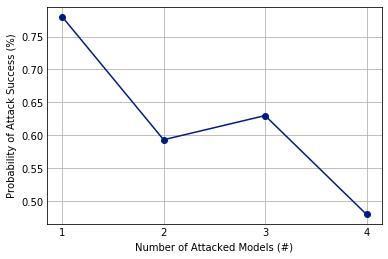

In [41]:
from matplotlib.ticker import (AutoLocator, AutoMinorLocator)

M = [1, 2, 3, 4]
N = [3, 2, 1, 0]

plt.plot(M, prob, linestyle='-', marker='o')
plt.xticks(M, ['1', '2', '3', '4'])
plt.xlabel('Number of Attacked Models (#)')
plt.ylabel('Probability of Attack Success (%)')
ax = plt.gca()
ax.tick_params(axis=u'both', which=u'both',length=0)
fig = plt.gcf()
plt.grid()
plt.show()
fig.savefig('plots_and_figures/probability_of_attack_CW_four.png')

In [45]:
adv_1 = np.load('1-1_adv.csv.npy')
inp_1 = np.load('1-1_inputs.csv.npy')
adv_baseline = np.load('four_subset_data/adv_att_baseline.csv.npy')
inp_baseline = np.load('four_subset_data/inputs_att__baseline.csv.npy')

In [75]:
p11 = round(np.sum(np.abs(adv_1[0] - inp_1[0])), 2)
pb = round(np.sum(np.abs(adv_baseline[0] - inp_baseline[0])), 2)
p1 = round(np.sum(np.abs(adv1[0] - inp1[0])), 2)
p2 = round(np.sum(np.abs(adv13[0] - inp13[0])), 2)
p3 = round(np.sum(np.abs(adv123[0] - inp123[0])), 2)
p4 = round(np.sum(np.abs(adv1234[0] - inp1234[0])), 2)

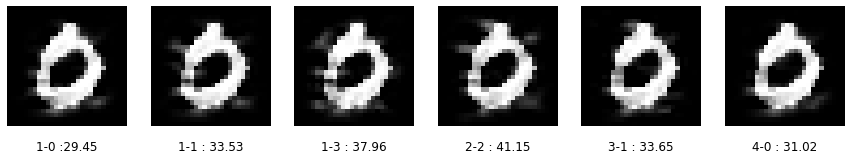

In [78]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(15, 150))
ax1.axis('off')
ax1.imshow(adv_baseline[0][:,:,0])
ax2.axis('off')
ax2.imshow(adv_1[0][:,:,0])
ax3.axis('off')
ax3.imshow(adv1[0][:,:,0])
ax4.axis('off')
ax4.imshow(adv13[0][:,:,0])
ax5.axis('off')
ax5.imshow(adv123[0][:,:,0])
ax6.axis('off')
ax6.imshow(adv1234[0][:,:,0])

ax1.text(0.5, -0.2, '1-0 :' + str(pb), size=12, ha="center", 
         transform=ax1.transAxes)
ax2.text(0.5,-0.2, '1-1 : ' + str(p11), size=12, ha="center", 
         transform=ax2.transAxes)
ax3.text(0.5, -0.2, '1-3 : ' + str(p1), size=12, ha="center", 
         transform=ax3.transAxes)
ax4.text(0.5,-0.2, '2-2 : ' + str(p2), size=12, ha="center", 
         transform=ax4.transAxes)
ax5.text(0.5, -0.2, '3-1 : ' + str(p3), size=12, ha="center", 
         transform=ax5.transAxes)
ax6.text(0.5,-0.2, '4-0 : ' + str(p4), size=12, ha="center", 
         transform=ax6.transAxes)

ax1.margins(0,0)
ax2.margins(0,0)
ax3.margins(0,0)
ax4.margins(0,0)
ax5.margins(0,0)
ax6.margins(0,0)
fig.savefig('attacks_and_perturbations.pdf', bbox_inches = 'tight', pad_inches = 0)

In [3]:
adv1 = np.load('adversarial_data/adv_dual_att_def_0.csv.npy')
adv1.shape

In [13]:
def avg_probability(adv, model):
    pr_true_avg = 0
    for i in range(0, len(adv)):
        pr_true_avg += get_label_probabilities(adv[i][np.newaxis, ...], model)[0][0]
    return pr_true_avg / len(adv)

def get_label_probabilities(image, model):
    pr = model.predict(image)
    pr = np.array([np.exp(x) for x in pr])
    return pr / np.sum(pr)

In [15]:
avg_probability(adv1, model5.model)

0.8427116149663925